In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

file = pd.read_csv("Data/UK_cars/toyota.csv")

file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [2]:
file["model"] = [x.strip() for x in file.model]

In [3]:
mask = (file["model"] == "Aygo")|(file["model"] == "Yaris")
df2 = file.loc[mask,:]
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [4]:
df2.groupby("model").agg({"price":"mean"})

,price
model,
Aygo,7905.414584
Yaris,10553.083883


In [5]:
df2.groupby("model").agg({"price":"median"})

,price
model,
Aygo,7895.0
Yaris,10652.5


In [6]:
df2.groupby("model").agg({"price":"var"})

,price
model,
Aygo,2.764884e+06
Yaris,6.608439e+06


In [7]:
df2.groupby("model").agg({"price":"std"})

,price
model,
Aygo,1662.794122
Yaris,2570.688483


<AxesSubplot:xlabel='price', ylabel='Count'>

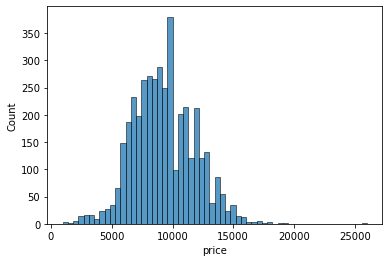

In [8]:
sns.histplot(data=df2, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

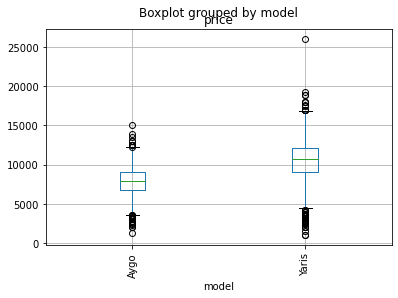

In [9]:
df2.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [10]:
maska = (df2["price"] < 25000) 
df3 = df2.loc[maska,:]
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


<AxesSubplot:title={'center':'price'}, xlabel='model'>

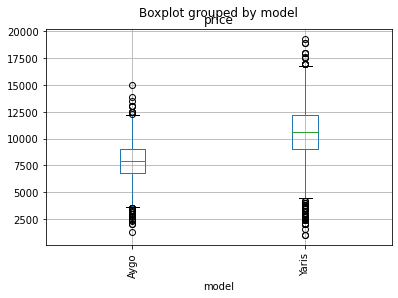

In [11]:
df3.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

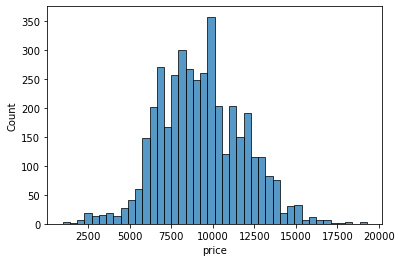

In [12]:
sns.histplot(data=df3, x="price")

In [13]:
df3.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5


In [14]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats



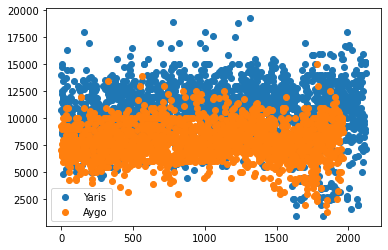

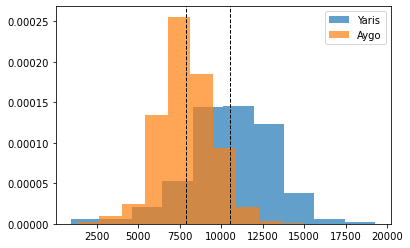

In [15]:
population1a = df3.loc[df3["model"]=="Yaris",:]
population2a= df3.loc[df3["model"]=="Aygo",:]
population1b = population1a["price"]
population2b = population2a["price"]

plt.scatter(range(len(population1b)), population1b, label="Yaris")
plt.scatter(range(len(population2b)), population2b, label="Aygo")
plt.legend()
plt.show()

plt.hist(population1b, 10, density=True, alpha=0.7, label="Yaris")
plt.hist(population2b, 10, density=True, alpha=0.7, label="Aygo")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [16]:
np.mean(population1b)

10545.803394625176

In [17]:
np.mean(population2b)

7905.414584395717

In [18]:
np.var(population1b)

6495961.578036574

In [19]:
np.var(population2b)

2763474.3559117196

In [20]:
stats.ttest_ind(population1b, population2b, equal_var=False)

Ttest_indResult(statistic=39.474492802499356, pvalue=1.8625242244512783e-284)

In [21]:
file2 = pd.read_csv("Data/UK_cars/ford.csv")

file2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [22]:
file2["model"] = [x.strip() for x in file2.model]

In [23]:
maskb = (file2["model"] == "Fiesta")|(file2["model"] == "Focus")
df2b = file2.loc[maskb,:]
df2b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [24]:
df2b.groupby("model").agg({"price":"mean"})

,price
model,
Fiesta,10196.298002
Focus,13185.882956


<AxesSubplot:xlabel='price', ylabel='Count'>

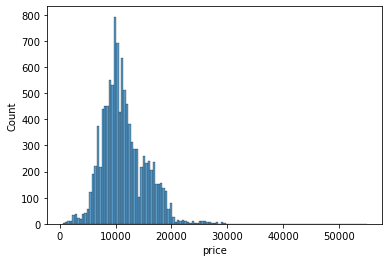

In [25]:
sns.histplot(data=df2b, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

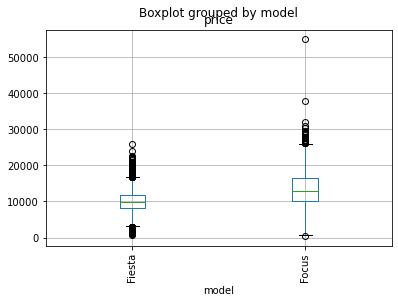

In [26]:
df2b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [27]:
maske = (df2b["price"] < 35000) 
df3b = df2b.loc[maske,:]
df3b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

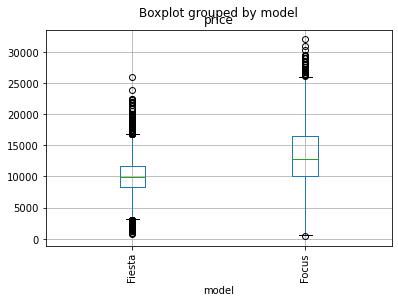

In [28]:
df3b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

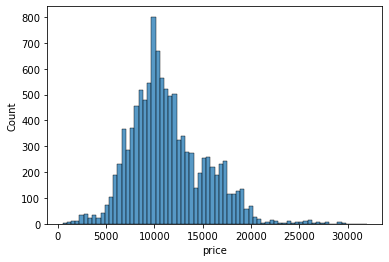

In [29]:
sns.histplot(data=df3b, x="price")

In [30]:
maskh = (((df3b["model"] == "Fiesta") & (df3b["price"] < 20000)) | ((df3b["model"] == "Focus") & (df3b["price"] < 27000)))
df3c = df3b.loc[maskh,:]
df3c

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

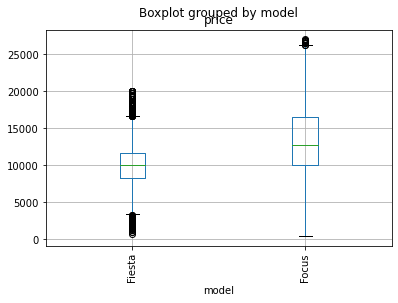

In [31]:
df3c.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

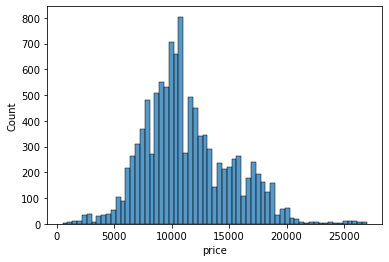

In [32]:
sns.histplot(data=df3c, x="price")

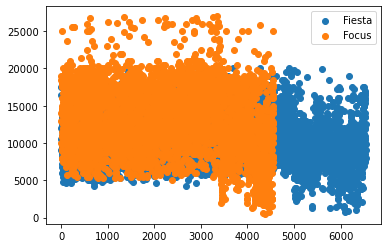

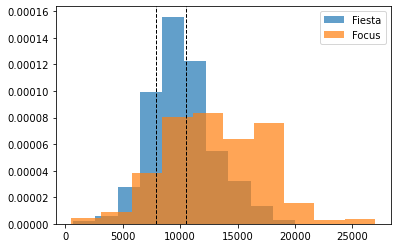

In [33]:
population1c =  df3c.loc[df3c["model"]=="Fiesta",:]
population2c= df3c.loc[df3c["model"]=="Focus",:]
population1d = population1c["price"]
population2d = population2c["price"]

plt.scatter(range(len(population1d)), population1d, label="Fiesta")
plt.scatter(range(len(population2d)), population2d, label="Focus")
plt.legend()
plt.show()

plt.hist(population1d, 10, density=True, alpha=0.7, label="Fiesta")
plt.hist(population2d, 10, density=True, alpha=0.7, label="Focus")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [34]:
np.mean(population1d)

10165.540366972476

In [35]:
np.mean(population2d)

13083.716885964912

In [36]:
np.var(population1d)

7997103.740113615

In [37]:
np.var(population2d)

18576801.28234644

In [38]:
stats.ttest_ind(population1d, population2d, equal_var=False)

Ttest_indResult(statistic=-40.09278905193241, pvalue=0.0)

In [39]:
list1 = [df3, df3c]

df100 = pd.concat(list1)
df100.reset_index(drop=True, inplace=True)
df100

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:xlabel='price', ylabel='Count'>

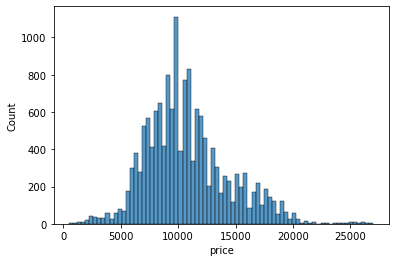

In [40]:
sns.histplot(data=df100, x="price")

In [41]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15182 entries, 0 to 15181
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15182 non-null  object 
 1   year          15182 non-null  int64  
 2   price         15182 non-null  int64  
 3   transmission  15182 non-null  object 
 4   mileage       15182 non-null  int64  
 5   fuelType      15182 non-null  object 
 6   tax           15182 non-null  int64  
 7   mpg           15182 non-null  float64
 8   engineSize    15182 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [42]:
df100.describe()

,year,price,mileage,tax,mpg,engineSize
count,15182.000000,15182.000000,15182.000000,15182.000000,15182.000000,15182.000000
mean,2016.877289,10803.224213,21830.551904,100.573376,61.386688,1.207575
std,2.056196,3622.296768,17557.438461,65.586757,9.292117,0.295449
min,1998.000000,495.000000,1.000000,0.000000,26.300000,0.000000
25%,2016.000000,8298.000000,9782.000000,20.000000,56.500000,1.000000
50%,2017.000000,10298.000000,17250.000000,145.000000,60.100000,1.000000
75%,2018.000000,12698.000000,29294.250000,145.000000,65.700000,1.500000
max,2060.000000,26995.000000,177644.000000,330.000000,88.300000,2.500000


In [43]:
unique = df100["model"].unique()
unique

array(['Yaris', 'Aygo', 'Fiesta', 'Focus'], dtype=object)

In [44]:
unique = df100["year"].unique()
unique

array([2019, 2018, 2016, 2014, 2017, 2020, 2013, 2015, 2009, 2007, 2008,
       2002, 1999, 2012, 2011, 2010, 2005, 2000, 2003, 2006, 2004, 1998,
       2060], dtype=int64)

In [45]:
mask15 = df100["year"] == 2060
df101 = df100.loc[mask15,:]
df101

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
15060,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [46]:
mask16 = df100["year"] != 2060
df102 = df100.loc[mask16,:]
df102

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [47]:
unique = df102["year"].unique()
unique

array([2019, 2018, 2016, 2014, 2017, 2020, 2013, 2015, 2009, 2007, 2008,
       2002, 1999, 2012, 2011, 2010, 2005, 2000, 2003, 2006, 2004, 1998],
      dtype=int64)

In [48]:
count = df102["model"].value_counts()
count

Fiesta    6539
Focus     4560
Yaris     2121
Aygo      1961
Name: model, dtype: int64

In [49]:
count = df102["year"].value_counts()
count

2017    3967
2018    3562
2019    2744
2016    1913
2015    1178
2014     725
2013     514
2020     181
2012      96
2009      73
2011      70
2010      45
2008      43
2007      29
2005      13
2006      13
2004       4
2003       4
2002       3
2000       2
1999       1
1998       1
Name: year, dtype: int64

In [50]:
mask200 = ((df102["year"] == 2012)|(df102["year"] == 2020)|(df102["year"] == 2013)|(df102["year"] == 2014)|(df102["year"] == 2015)|(df102["year"] == 2016)|(df102["year"] == 2019)|(df102["year"] == 2018)|(df102["year"] == 2017))
df103 = df102.loc[mask200,:]
df103

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [51]:
count = df103["year"].value_counts()
count

2017    3967
2018    3562
2019    2744
2016    1913
2015    1178
2014     725
2013     514
2020     181
2012      96
Name: year, dtype: int64

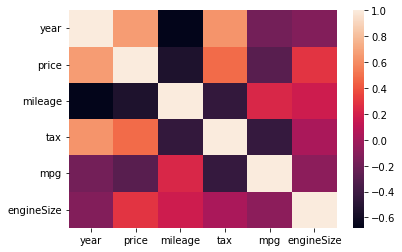

In [52]:
corrs = df103.corr()
sns.heatmap(corrs)
plt.show() 

In [53]:
corrs

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.662853,-0.679650,0.628961,-0.184289,-0.127926
price,0.662853,1.000000,-0.544893,0.478622,-0.292582,0.289992
mileage,-0.679650,-0.544893,1.000000,-0.452564,0.231069,0.170512
tax,0.628961,0.478622,-0.452564,1.000000,-0.441905,0.026170
mpg,-0.184289,-0.292582,0.231069,-0.441905,1.000000,-0.082911
engineSize,-0.127926,0.289992,0.170512,0.026170,-0.082911,1.000000


In [54]:
#https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

import statsmodels.api as sm

X_constant = sm.add_constant(df103.mileage)
lin_reg = sm.OLS(df103.price,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     6283.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:23:04   Log-Likelihood:            -1.3991e+05
No. Observations:               14880   AIC:                         2.798e+05
Df Residuals:                   14878   BIC:                         2.798e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.347e+04     39.896    337.739      0.000    1.34e+04    1.36e+04
mileage       -0.1214      0.002    -79.264      0.000      -0.124      -0.118
==============================================================================
Omnibus:                     1848.375   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2886.910
Skew:                           0.887   Prob(JB):                         0.00
Kurtosis:                       4.228   Cond. No.                     4.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

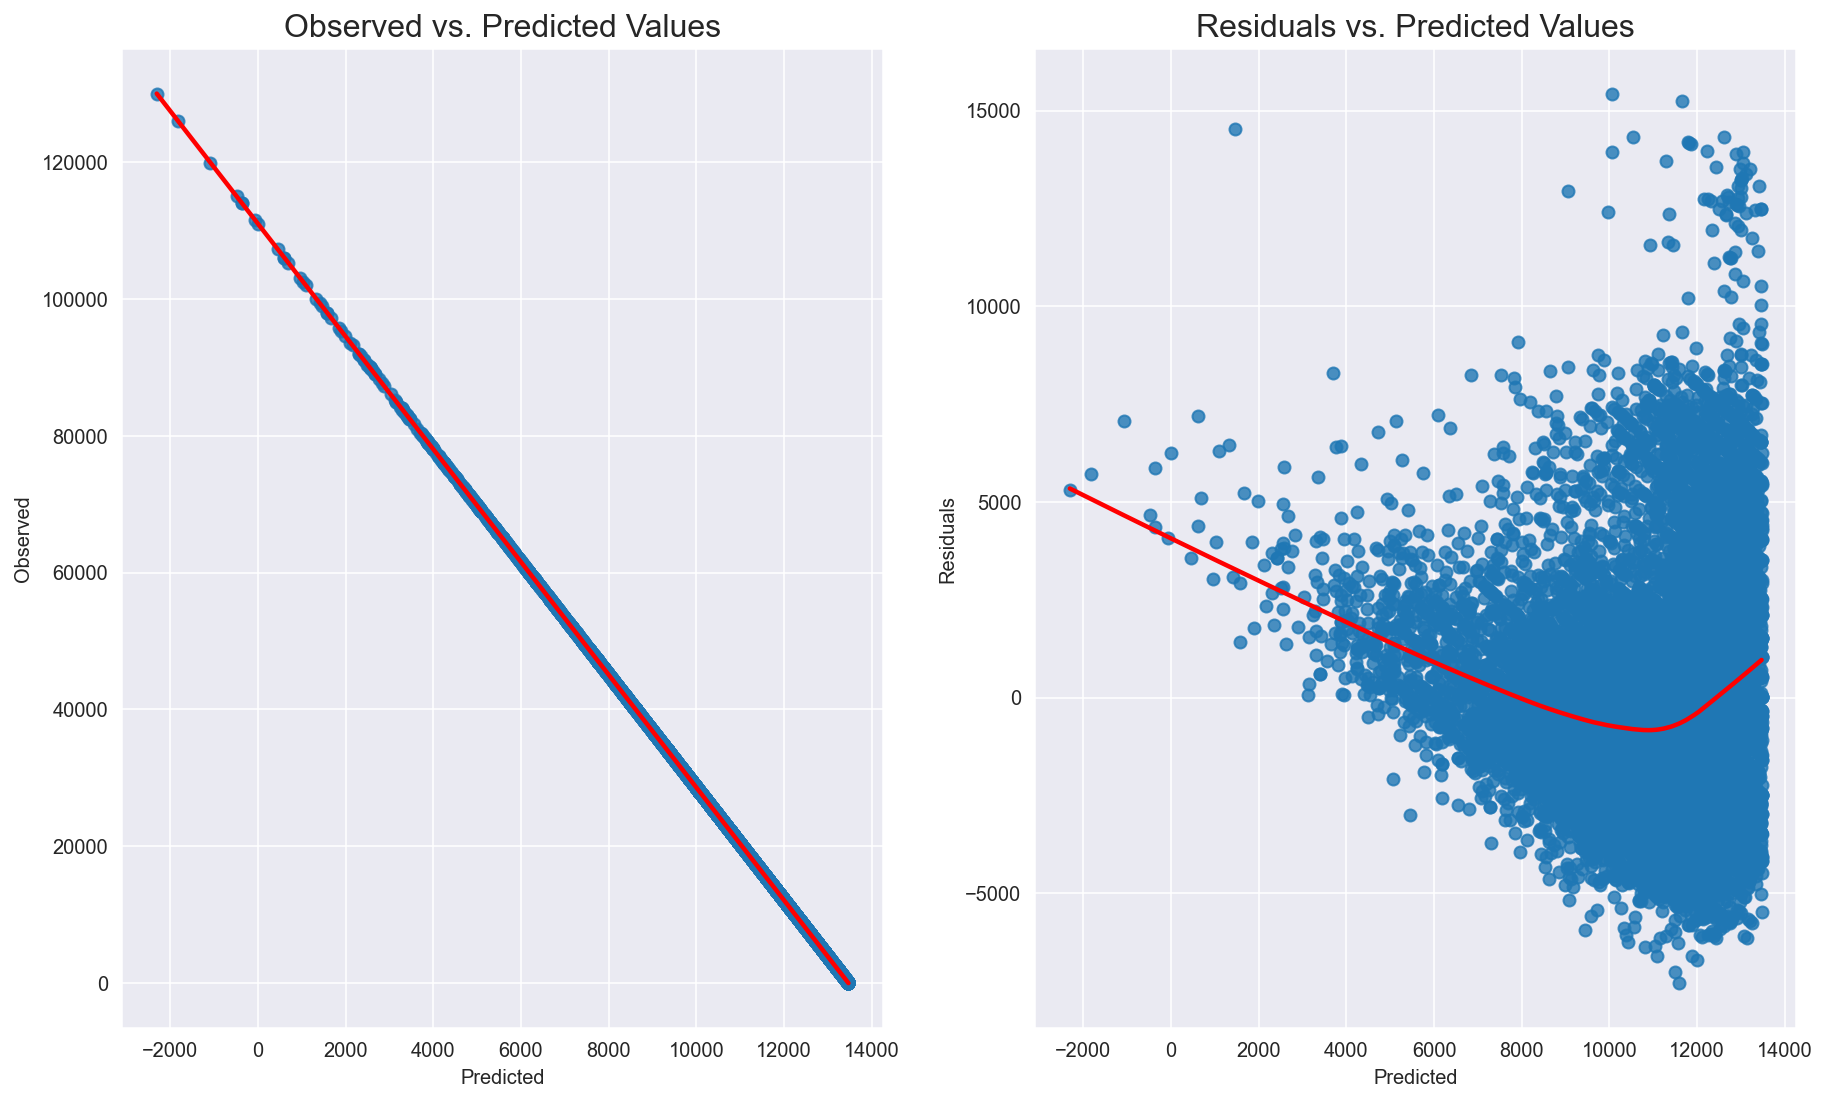

In [55]:
#https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, df103.mileage)  

In [56]:
#Expectation (mean) of residuals is zero

lin_reg.resid.mean()

-1.8516896498797623e-12


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  3.385247e+02
p-value                        1.337104e-75
f-value                        3.463590e+02
f p-value                      1.936970e-76

 Goldfeld-Quandt test ----
                value
F statistic  0.985628
p-value      0.733764

 Residuals plots ----


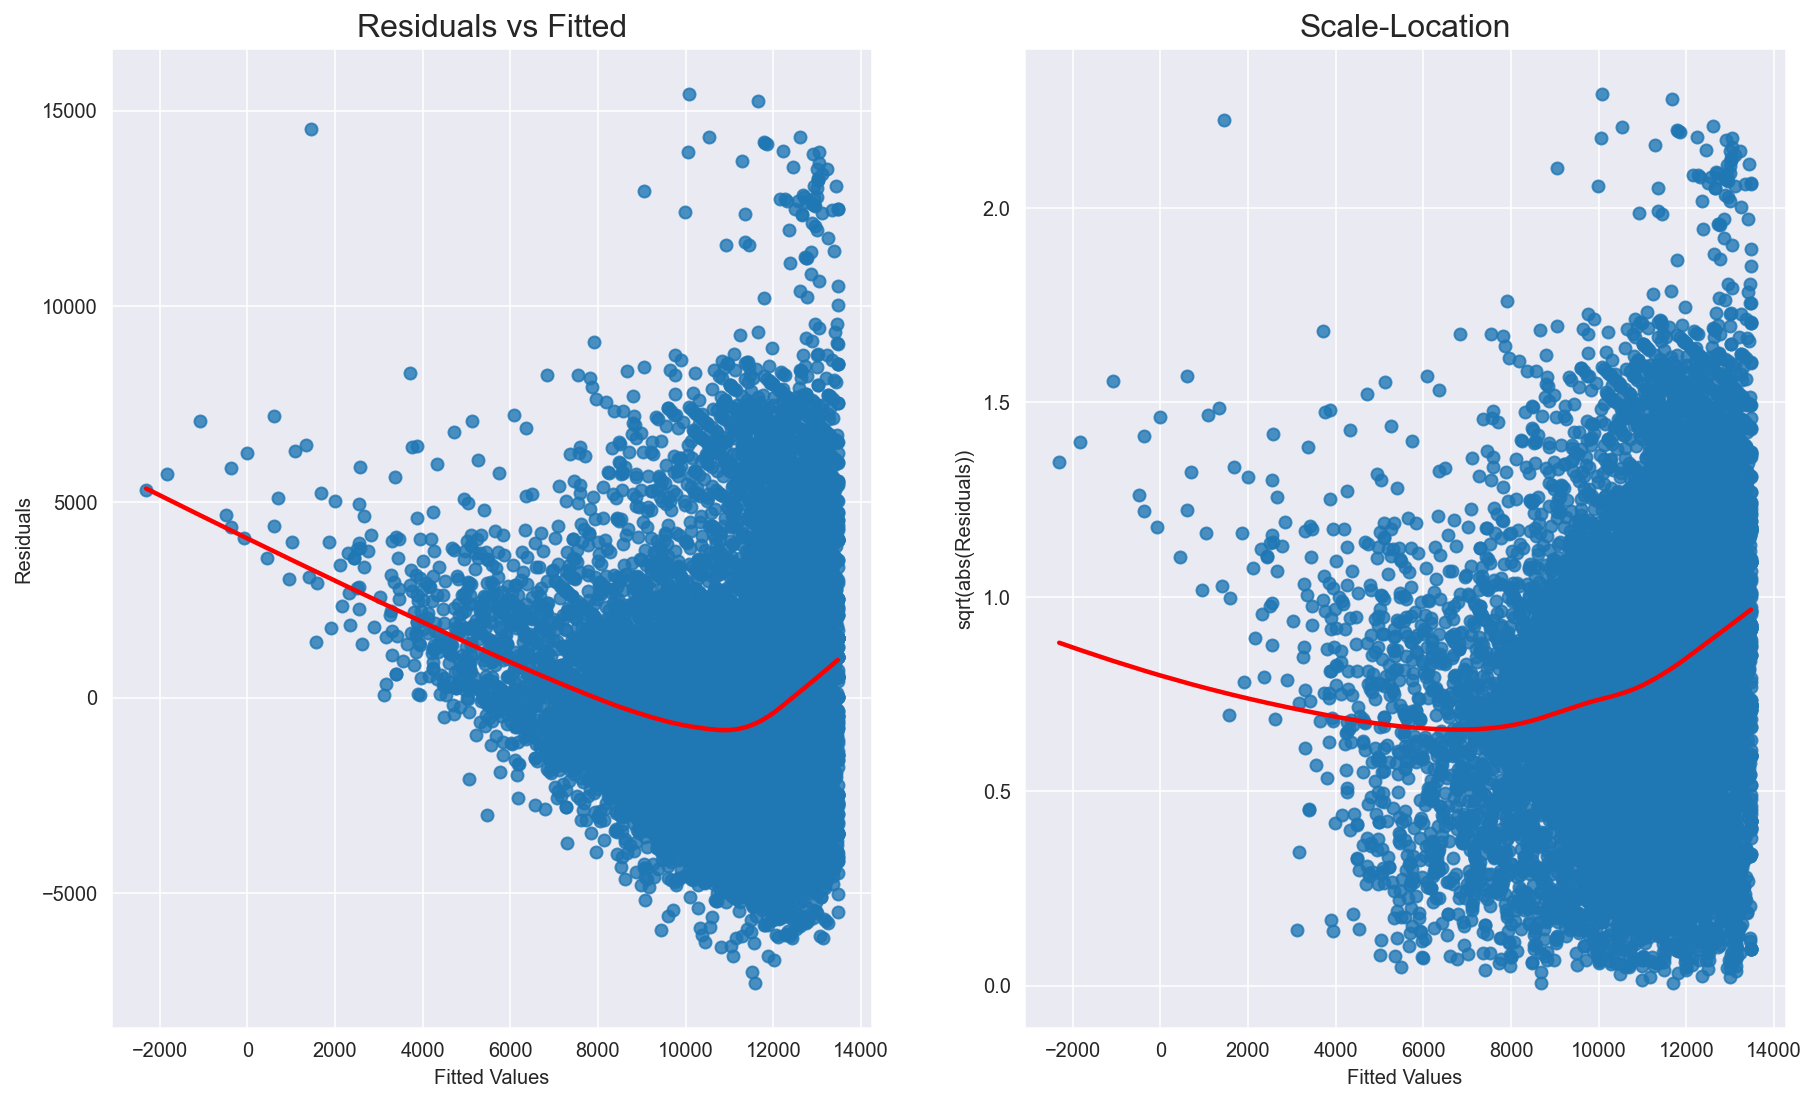

In [57]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

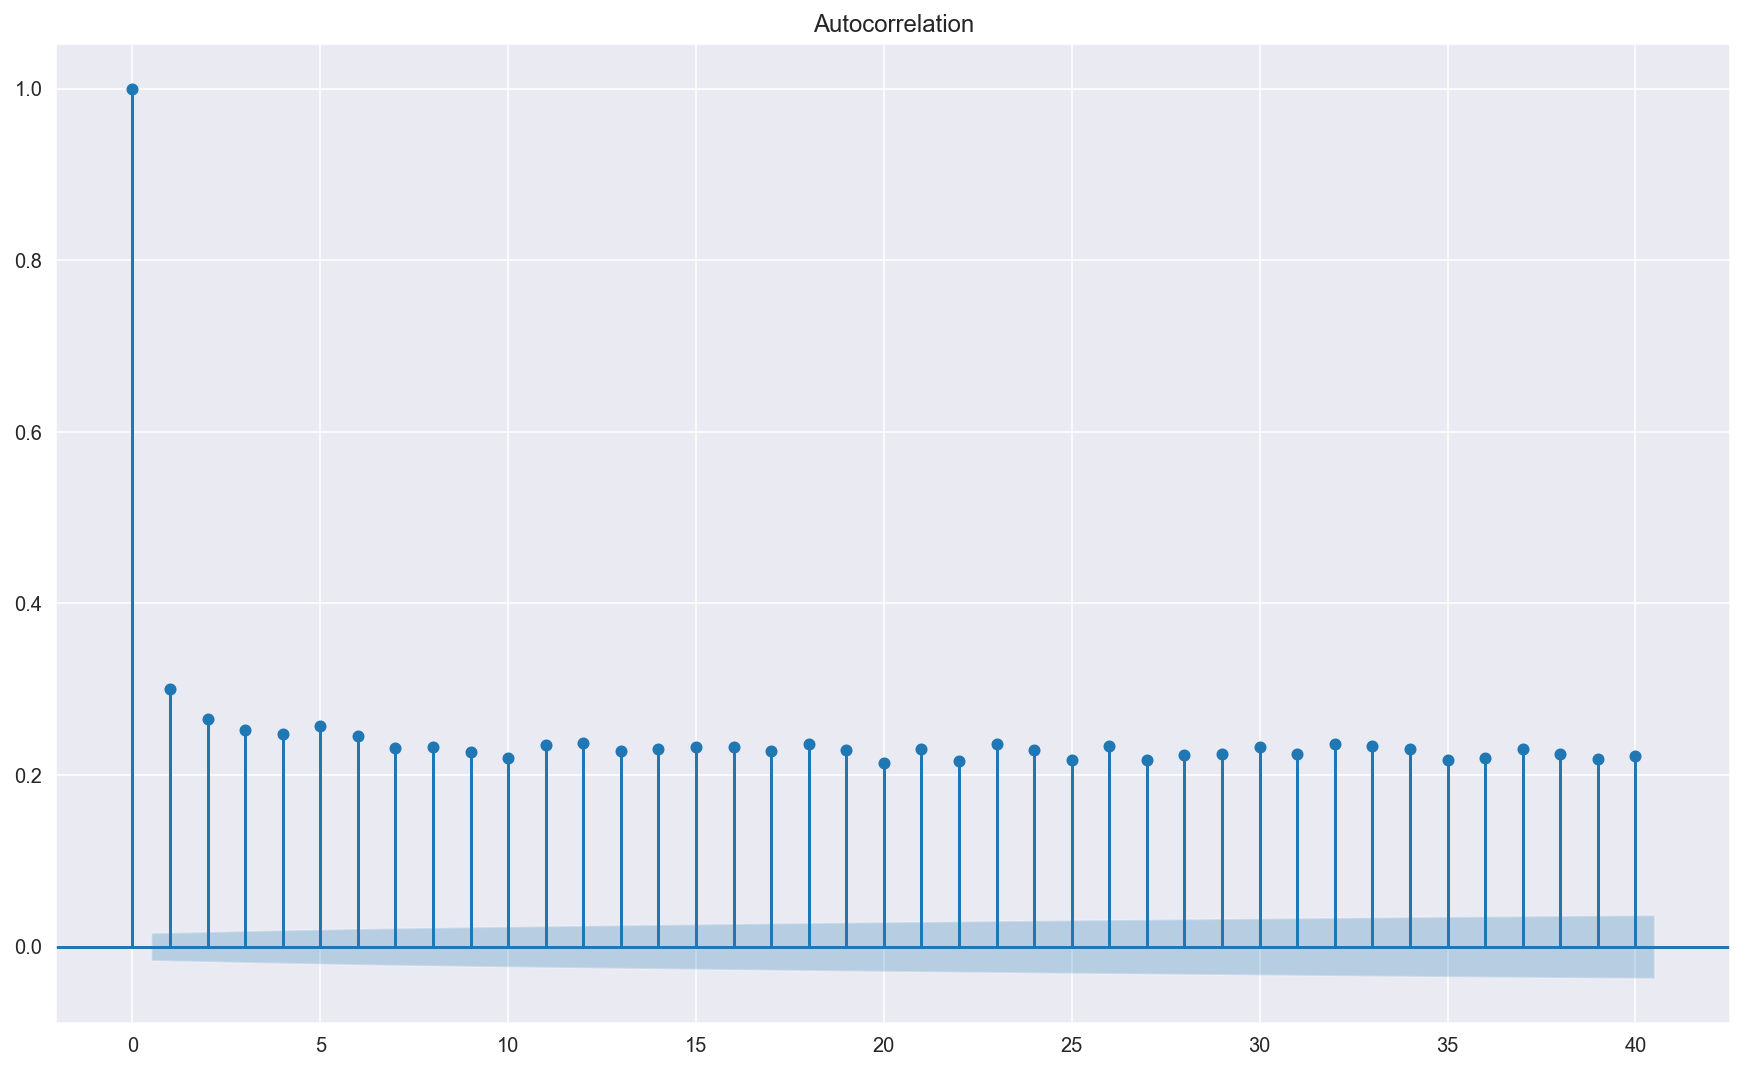

In [58]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

In [62]:
from scipy.stats.stats import pearsonr


corr_test = pearsonr(df103.mileage, lin_reg.resid)
print(f'Variable: Mileage --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: Mileage --- correlation: -0.0000, p-value: 1.0000


Jarque-Bera test ---- statistic: 2886.9099, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9578, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5643, p-value: 0.0000
Anderson-Darling test ---- statistic: 143.5840, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


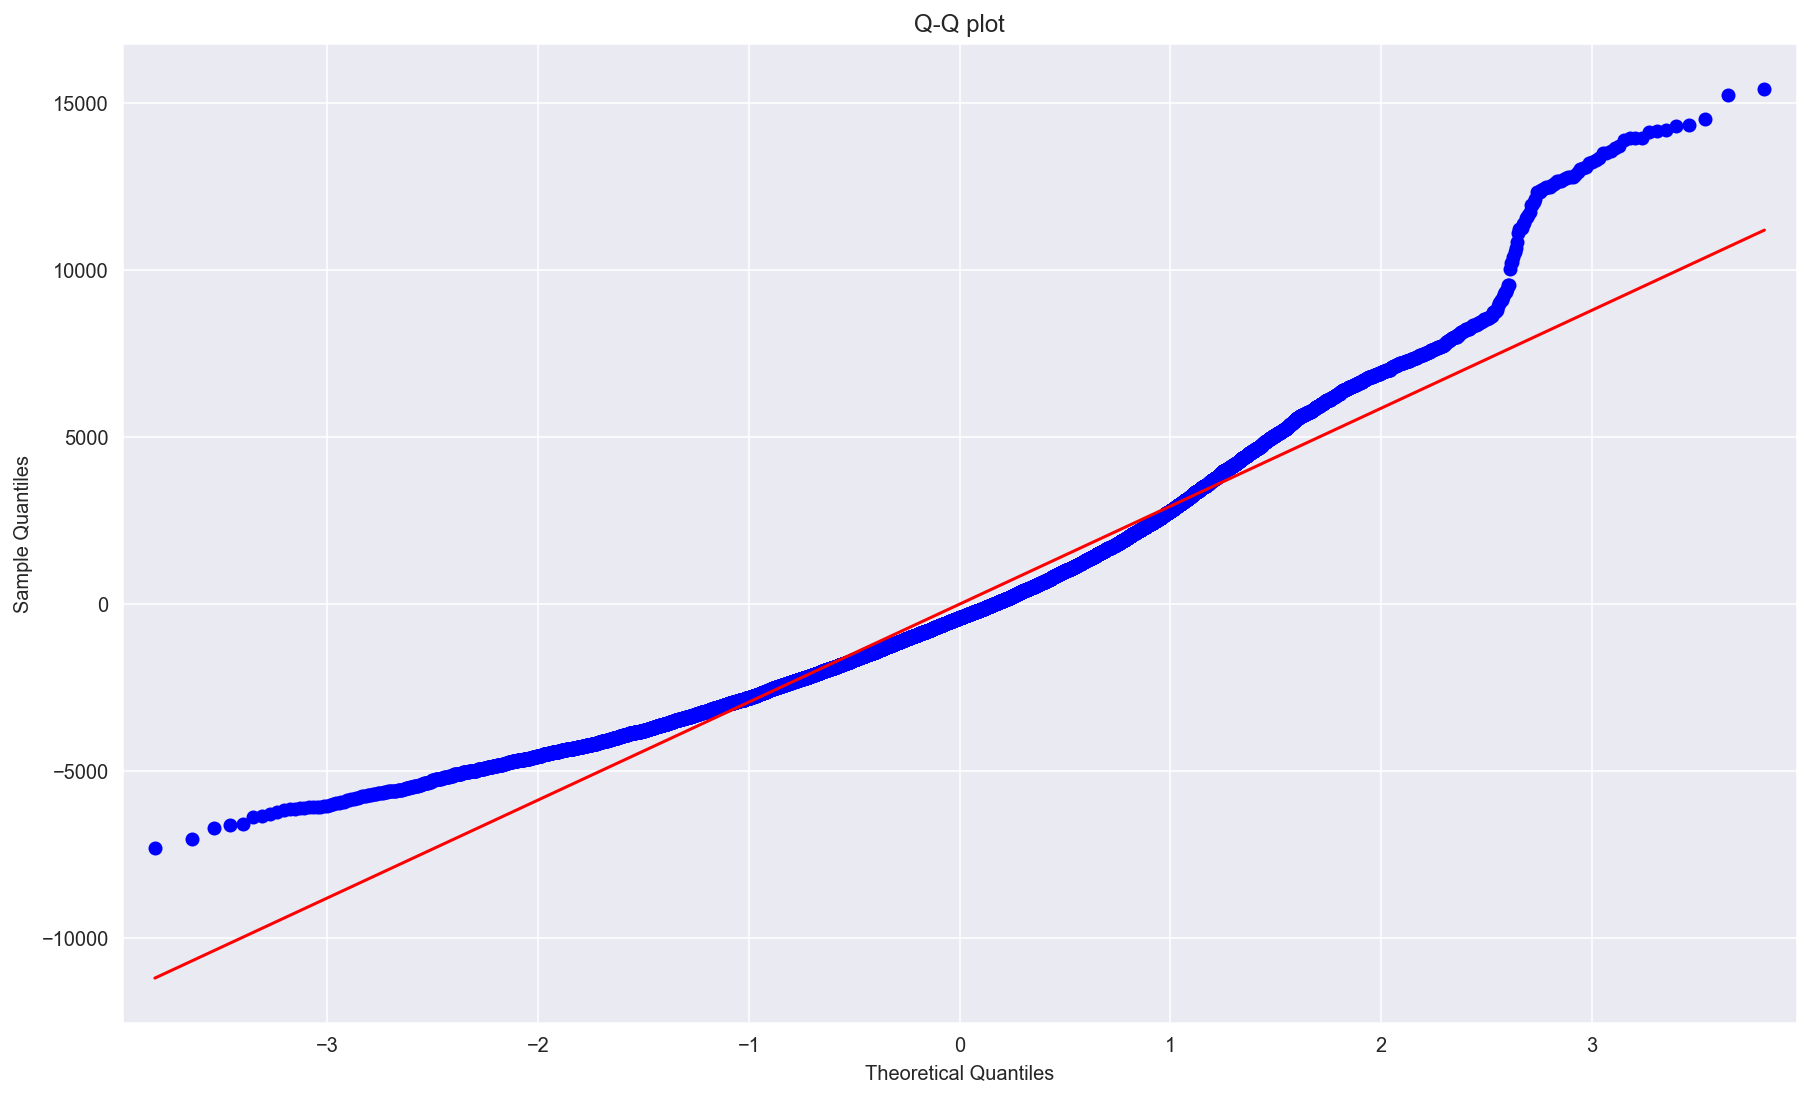

In [63]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

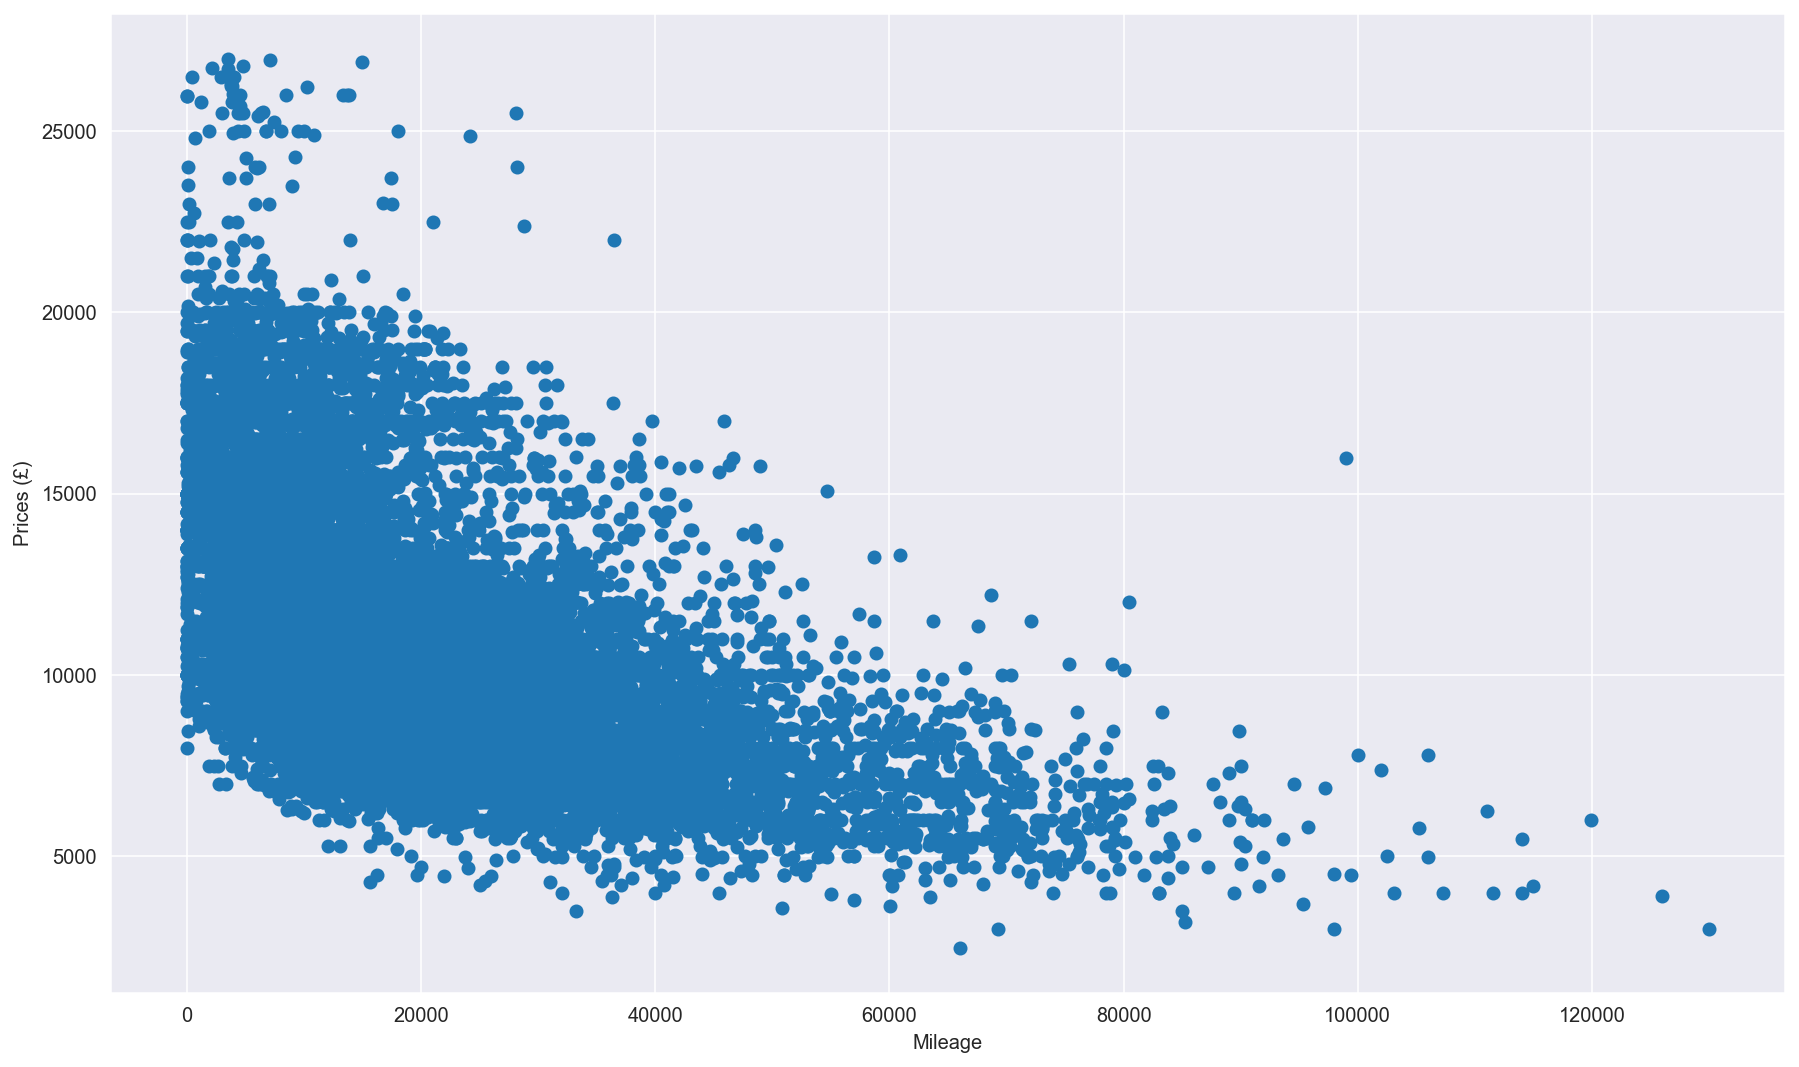

In [64]:
x_values = df103['mileage']
y_values = df103['price']
plt.scatter(x_values,y_values)
plt.xlabel('Mileage')
plt.ylabel('Prices (£)')
plt.show()

In [65]:
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [66]:
linregress(x_values, y_values)

LinregressResult(slope=-0.12142271286422623, intercept=13474.566497958114, rvalue=-0.5448928875304507, pvalue=0.0, stderr=0.0015318721258234655, intercept_stderr=39.89635970900857)

In [67]:
preds = x_values * slope + intercept

preds

0        12646.342174
1        11774.648518
2         9599.846308
3         4725.695768
4         9516.914595
             ...     
15177    11495.012010
15178    11066.268411
15179    12618.900640
15180     9668.207295
15181    12623.393281
Name: mileage, Length: 14880, dtype: float64

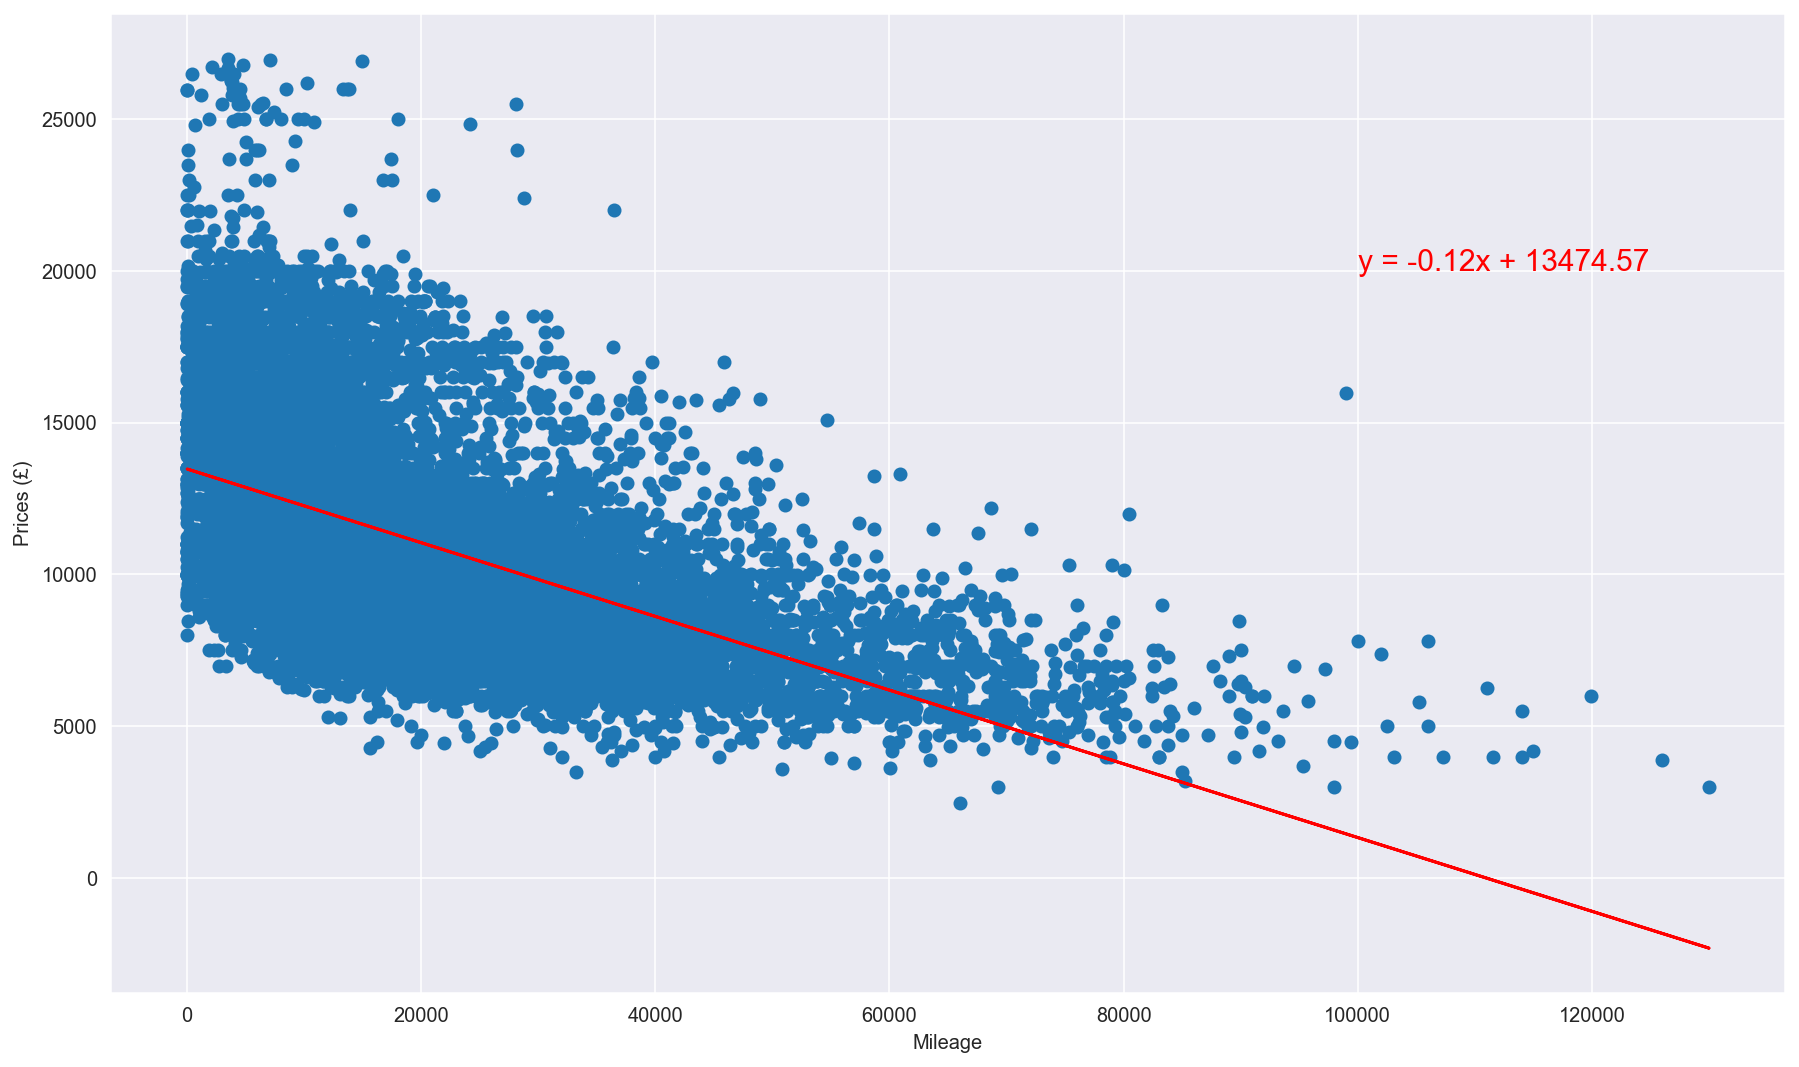

In [71]:
# Add the linear regression equation and line to plot
x_values = df103['mileage']
y_values = df103['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100000,20000),fontsize=15,color="red")
plt.xlabel('Mileage')
plt.ylabel('Prices (£)')
plt.show()

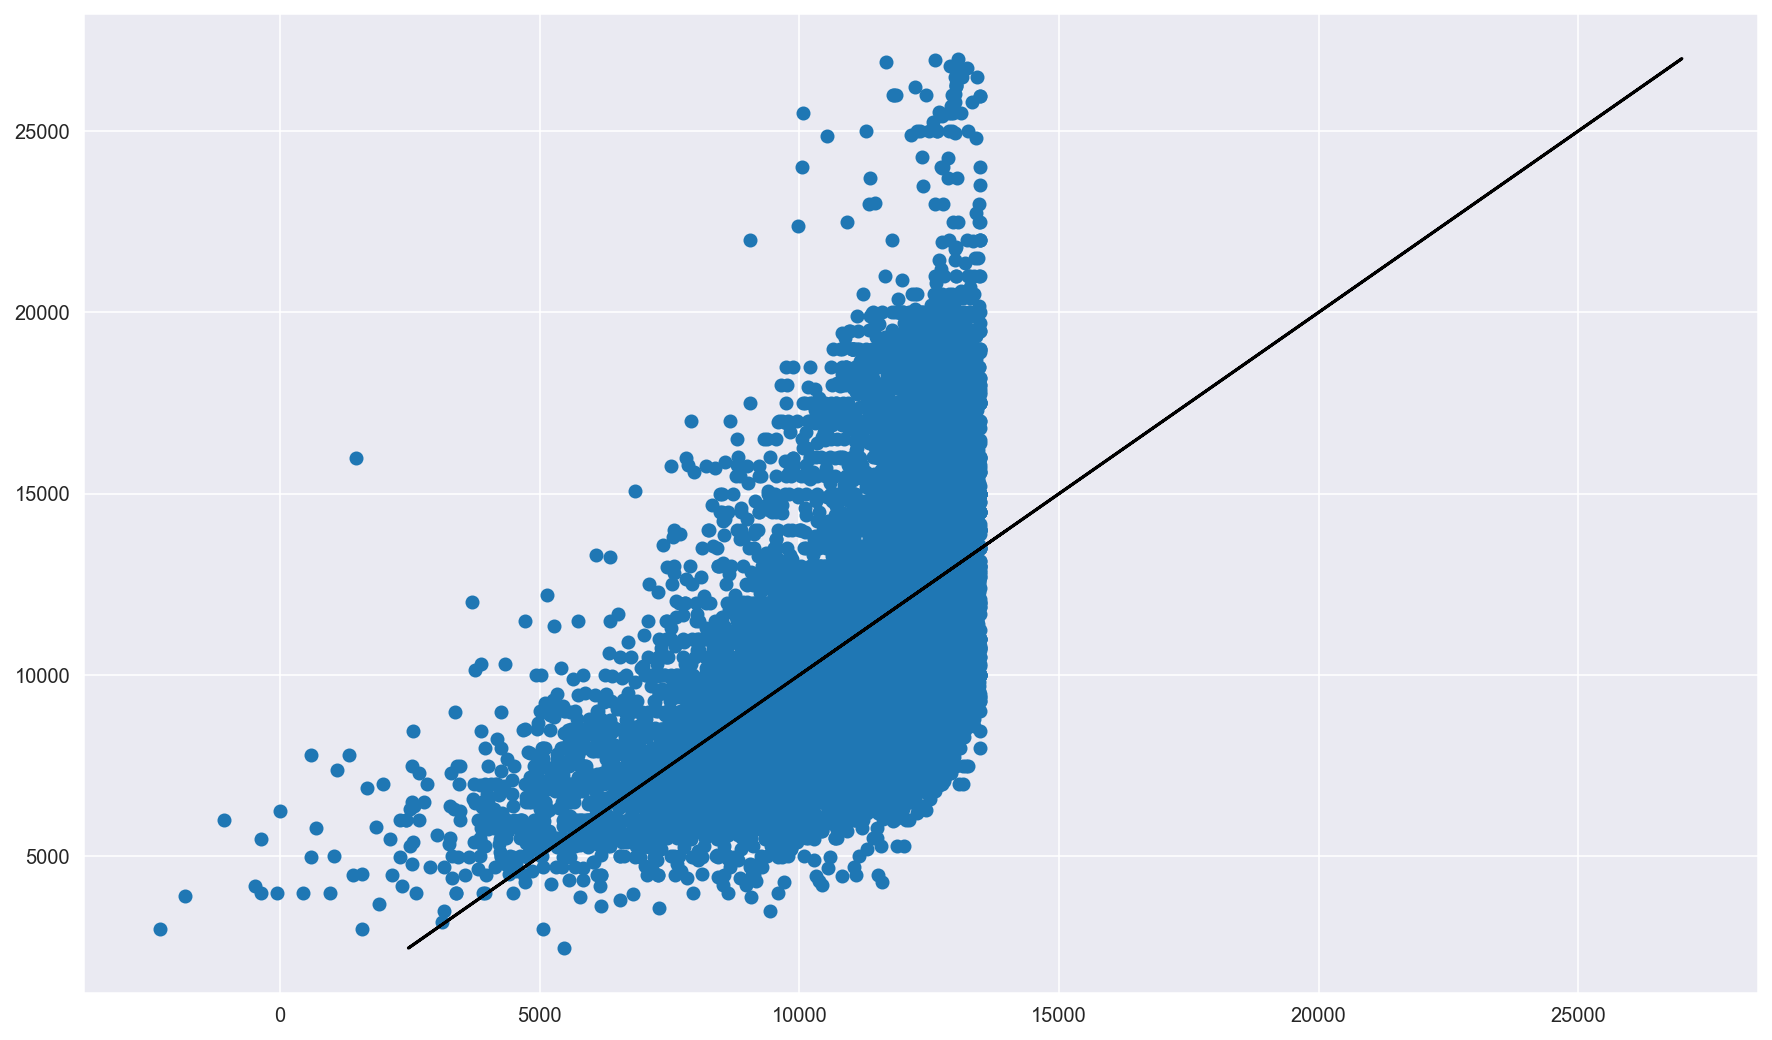

In [69]:
plt.scatter(preds, y_values)
plt.plot(y_values, y_values, color="black")
plt.show()

In [70]:
import statsmodels.api as sm

X = df103['mileage']

X = sm.add_constant(X) # adding a constant

y = df103['price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     6283.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:30:56   Log-Likelihood:            -1.3991e+05
No. Observations:               14880   AIC:                         2.798e+05
Df Residuals:                   14878   BIC:                         2.798e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.347e+04     39.896    337.739      0.0